<a href="https://colab.research.google.com/github/tulika1402/BAutomation/blob/main/5808025597.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 11.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manyl

In [2]:

import PIL
from PIL import ImageDraw
import pandas as pd
import re

import easyocr

reader=easyocr.Reader(['en'],gpu= True)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [3]:


im=PIL.Image.open("/content/5808025597.jpg")

bounds=reader.readtext("/content/5808025597.jpg")

bounds

[([[167, 170], [748, 170], [748, 219], [167, 219]],
  'Integrated Facility Management WLL',
  0.9990355411671911),
 ([[196, 227], [1040, 227], [1040, 265], [196, 265]],
  'CR: 76416-1 RO.Box: 32571, Manama, Kingdom of Bahrain',
  0.6607065816772644),
 ([[196, 252], [886, 252], [886, 293], [196, 293]],
  'Flat/Shop No. 2, Building: 230,Road/Street 328,',
  0.5260921906593766),
 ([[199, 280], [868, 280], [868, 320], [199, 320]],
  'Town: Salihiya, Block 356,Capital Governorate;',
  0.5914139488506833),
 ([[1870, 232], [2256, 232], [2256, 366], [1870, 366]],
  'IFLJ',
  0.3073022961616516),
 ([[197, 307], [333, 307], [333, 338], [197, 338]],
  'Tel- +973',
  0.5633791562187136),
 ([[353, 312], [782, 312], [782, 341], [353, 341]],
  '7402242,Fax: +973 17404467',
  0.8258292047554351),
 ([[194, 336], [696, 336], [696, 374], [194, 374]],
  'Email: info ifmoalmoayyedcg-com',
  0.5192386104723729),
 ([[1882, 349], [2246, 349], [2246, 370], [1882, 370]],
  'FACILTATING funcTiOnaLiTY',
  0.12328

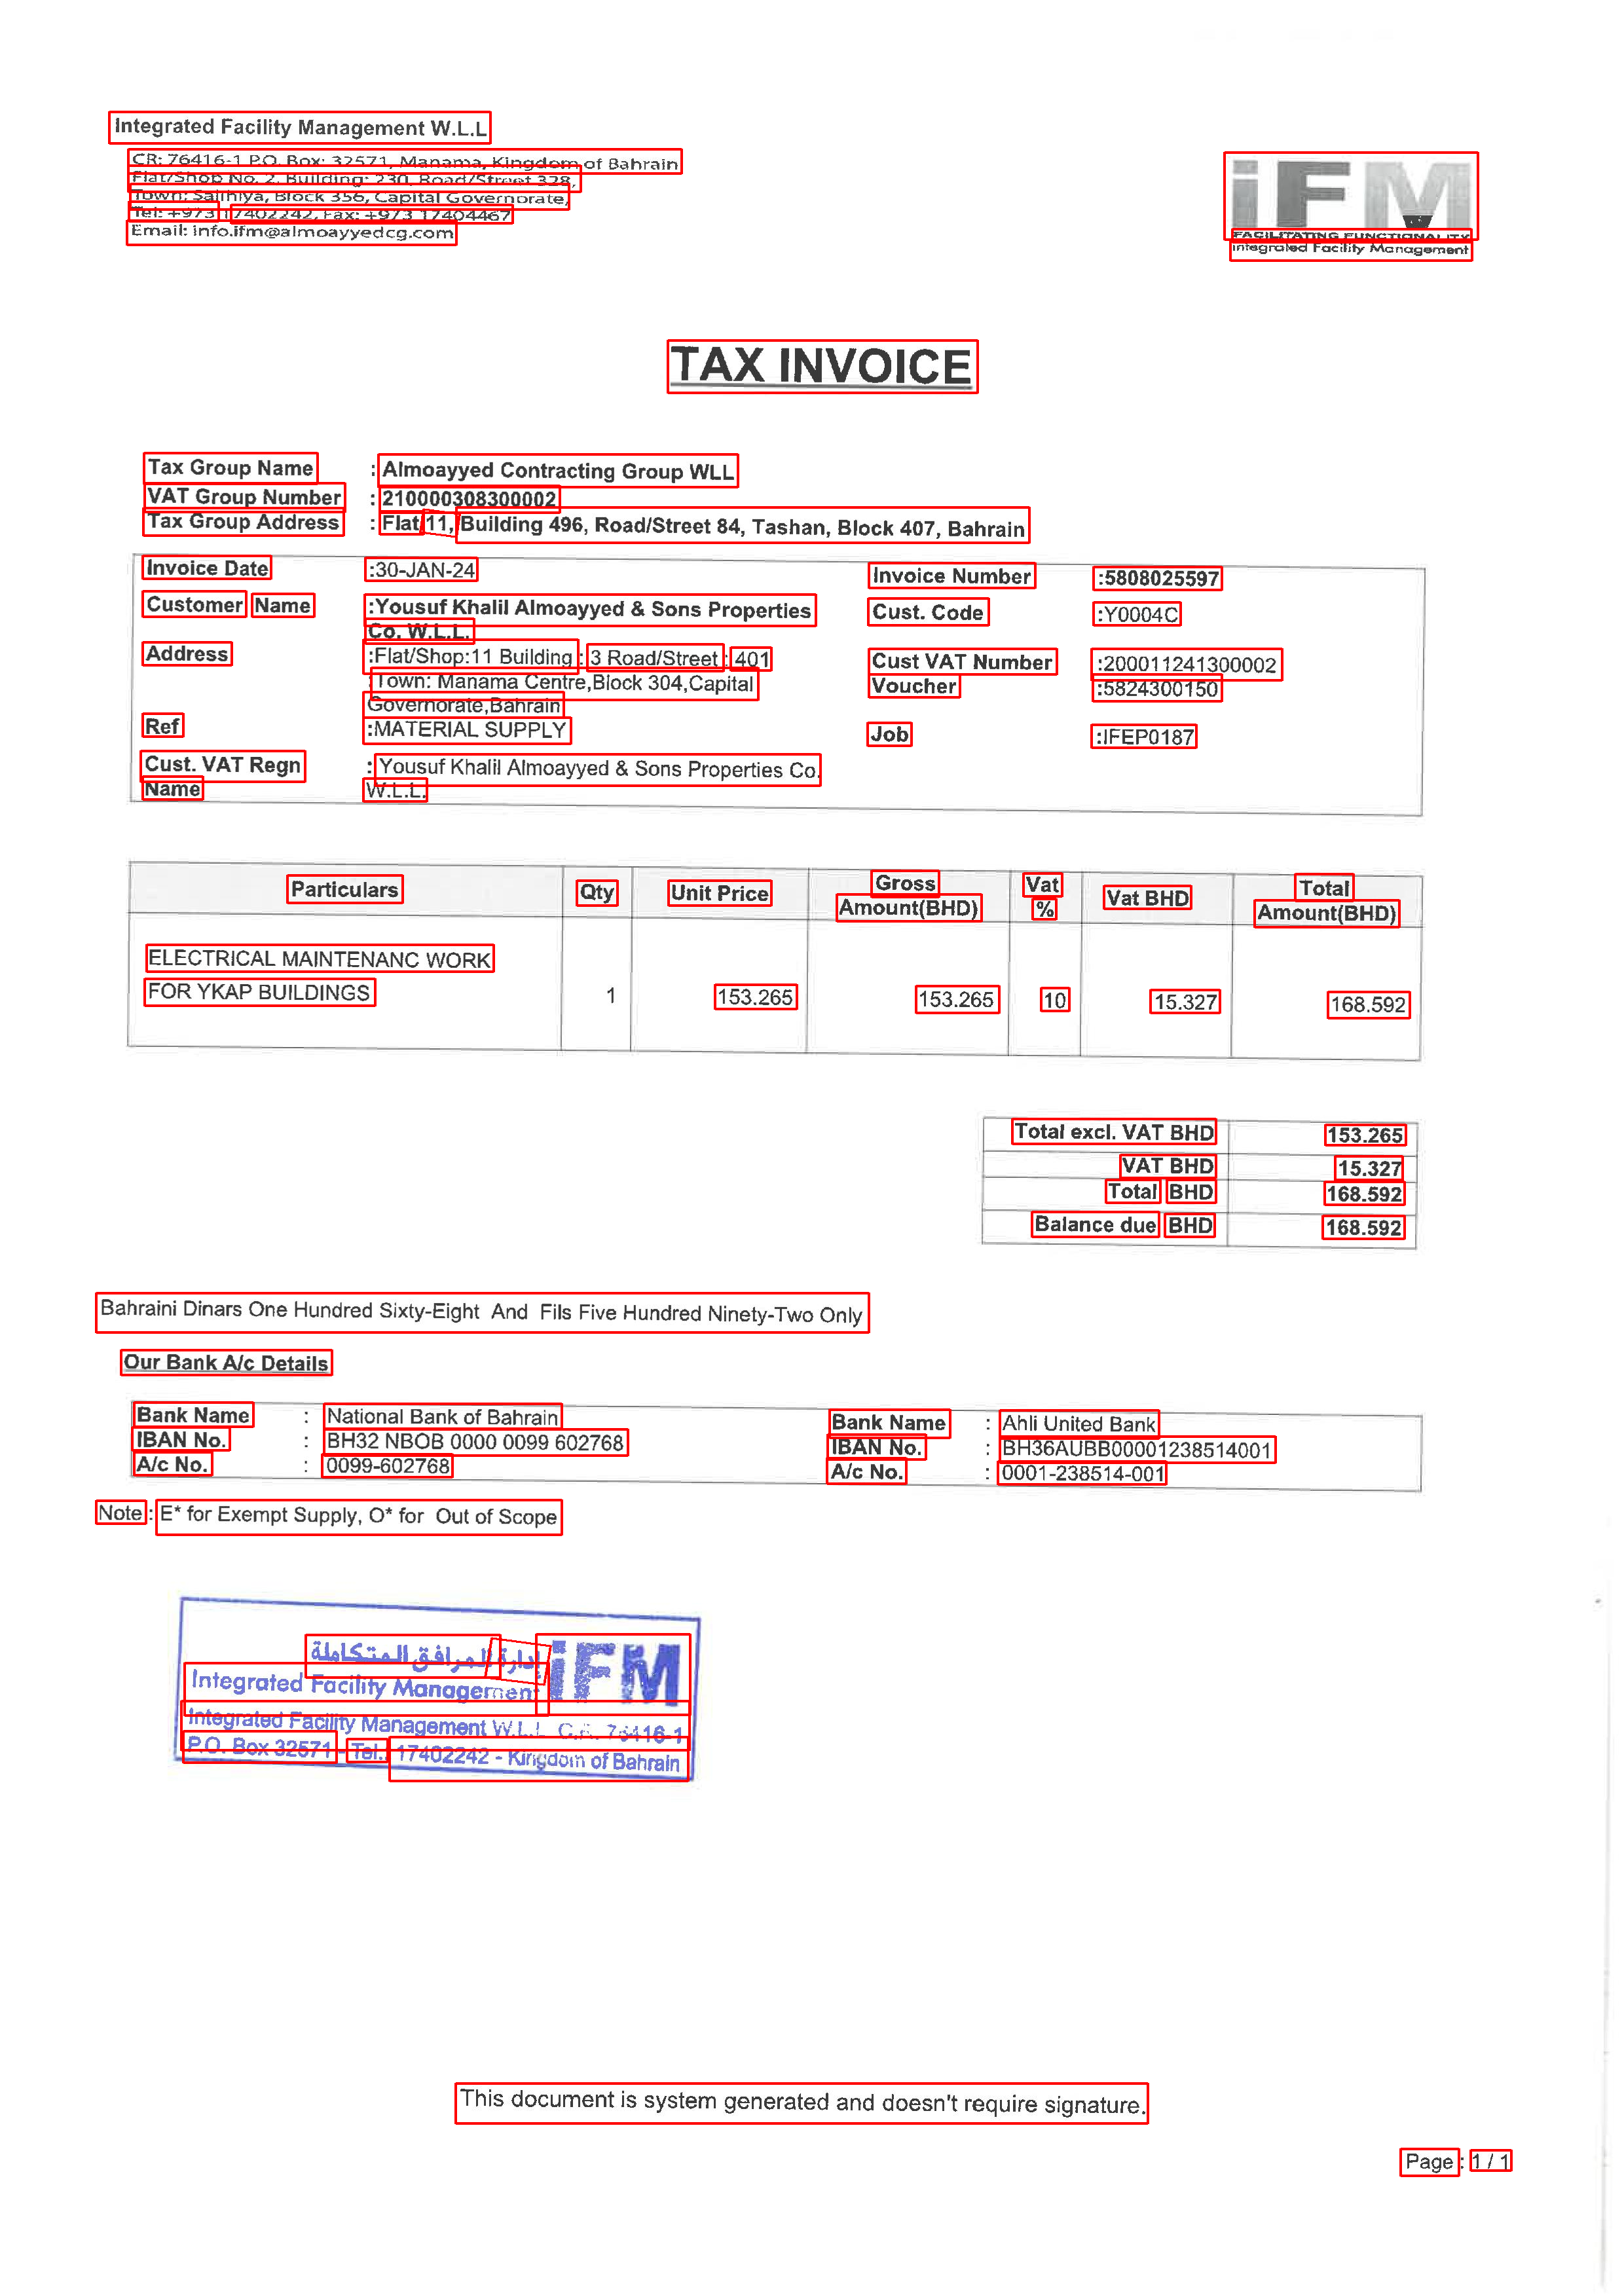

In [4]:
def draw_boxes(image,bounds,color="red",width=4):
  draw=ImageDraw.Draw(image)
  for bound in bounds:
    p0,p1,p2,p3=bound[0]
    draw.line([*p0,*p1,*p2,*p3,*p0], fill=color, width=width)
  return image

draw_boxes(im,bounds)

In [34]:

df=pd.DataFrame(bounds,columns=["bounding_box", "value","confidence_score"])

df

,bounding_box,value,confidence_score
0,"[[167, 170], [748, 170], [748, 219], [167, 219]]",Integrated Facility Management WLL,0.999036
1,"[[196, 227], [1040, 227], [1040, 265], [196, 2...","CR: 76416-1 RO.Box: 32571, Manama, Kingdom of ...",0.660707
2,"[[196, 252], [886, 252], [886, 293], [196, 293]]","Flat/Shop No. 2, Building: 230,Road/Street 328,",0.526092
3,"[[199, 280], [868, 280], [868, 320], [199, 320]]","Town: Salihiya, Block 356,Capital Governorate;",0.591414
4,"[[1870, 232], [2256, 232], [2256, 366], [1870,...",IFLJ,0.307302
...,...,...,...
96,"[[696, 3181], [1752, 3181], [1752, 3243], [696...",This document is system generated and doesn't ...,0.596721
97,"[[2139, 3281], [2227, 3281], [2227, 3323], [21...",Page,0.537843
98,"[[2246, 3283], [2307, 3283], [2307, 3315], [22...",1 /1,0.680164
99,"[[647.9294245448556, 777.1459283614803], [701....","11,",0.999838


In [24]:

filtered_df = df[df['value'] == 'Invoice Number']
if not filtered_df.empty:
    index_any = filtered_df.index[0]
    following_value = df.loc[index_any + 1, 'value']
    # Use regex to remove the colon and any surrounding whitespace
    cleaned_value = re.sub(r'^\s*:\s*', '', following_value)

    print("INVOICE NO", cleaned_value)
else:
    print("No rows found.")

INVOICE NO 5808025597


In [26]:
filtered_df1 = df[df['value'] == 'Invoice Date']

if not filtered_df1.empty:
    index_any = filtered_df1.index[0]
    following_values1= df.loc[index_any + 1, 'value']
        # Use regex to remove the colon and any surrounding whitespace
    cleaned_value2 = re.sub(r'^\s*:\s*', '', following_values1)

    print("date", cleaned_value2)
else:
    print("No rows found.")

date 30-JAN-24


In [27]:
filtered_df2 = df[df['value'] == 'Cust VAT Number']

if not filtered_df2.empty:
    index_any = filtered_df2.index[0]
    following_value2 = df.loc[index_any + 1, 'value']
    # Use regex to remove the colon and any surrounding whitespace
    cleaned_value3 = re.sub(r'^\s*:\s*', '', following_value)

    print("Vat NO", cleaned_value3)
else:
    print("No rows found.")

Vat NO 5808025597


In [35]:
filtered_df3 = df[df['value'] == 'Name']

if not filtered_df3.empty:
    index_any = filtered_df3.index[0]
    following_value3 = df.loc[index_any +1, 'value'] + " "+ df.loc[index_any + 5, 'value']
    # Use regex to remove the colon and any surrounding whitespace
    cleaned_value4 = re.sub(r'^\s*:\s*', '', following_value3)

    print("name", cleaned_value4)
else:
    print("No rows found.")

name Yousuf Khalil Almoayyed & Sons Properties Address


In [17]:
filtered_df4 = df[df['value'] == 'VAT BHD']

if not filtered_df4.empty:
    index_any = filtered_df4.index[0]
    following_value4 = df.loc[index_any + 1, 'value']
    print("VAT%", following_value4)
else:
    print("No rows  found.F")

VAT% 15.327


In [19]:
filtered_df5 = df[df['value'] == 'Total']

if not filtered_df5.empty:
    index_any = filtered_df5.index[0]
    following_value5 = df.loc[index_any +17, 'value']
    print("Total Amount", following_value5)
else:
    print("No rows  found.")

Total Amount 168.592


In [20]:
filtered_df6 = df[df['value'] == 'Particulars']

if not filtered_df6.empty:
    index_any = filtered_df6.index[0]

    index_any = int(index_any)

    following_value6 = (df.loc[index_any + 10, 'value'] + " " +
                        df.loc[index_any + 11, 'value'] + " " )



    print("PRODUCT ", following_value6)  # Access values of the resulting DataFrame
else:
    print("No rows found.")

PRODUCT-  ELECTRICAL MAINTENANC WORK FOR YKAP BUILDINGS 


In [36]:


data = {
    'Invoice Number': [cleaned_value],
    'Date': [cleaned_value2],
    'VAT Group Number': [cleaned_value3],
    'Customer Name': [cleaned_value4],
    'VAT%': [following_value4],
    'Amount': [following_value5],
    'Particulars': [following_value6]
}

# Convert the dictionary into a DataFrame
df = pd.DataFrame(data)

# Fill NaN values in the DataFrame with the values in the first row
df = df.fillna(method='ffill')

# Print the DataFrame
print(df)

                                      Invoice Number       Date  \
0  Yousuf Khalil Almoayyed & Sons Properties Address  30-JAN-24   

  VAT Group Number                                      Customer Name    VAT%  \
0       5808025597  Yousuf Khalil Almoayyed & Sons Properties Address  15.327   

    Amount                                     Particulars  
0  168.592  ELECTRICAL MAINTENANC WORK FOR YKAP BUILDINGS   
